In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

#### Import the data

In [12]:
raw_data =pd.read_csv('auto.csv', encoding = "latin1")

In [13]:
raw_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [15]:
raw_data.describe(include = 'all') #include-> to include categorical variables as well

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


## Dealing with missing values

In [19]:
raw_data.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [20]:
raw_data.isnull().sum()/raw_data.shape[0] * 100
#check for missing values

dateCrawled             0.000000
name                    0.000000
seller                  0.000000
offerType               0.000000
price                   0.000000
abtest                  0.000000
vehicleType            10.192771
yearOfRegistration      0.000000
gearbox                 5.439429
powerPS                 0.000000
model                   5.513447
kilometer               0.000000
monthOfRegistration     0.000000
fuelType                8.986133
brand                   0.000000
notRepairedDamage      19.395577
dateCreated             0.000000
nrOfPictures            0.000000
postalCode              0.000000
lastSeen                0.000000
dtype: float64

In [21]:
data = raw_data.dropna(axis =0)

In [22]:
raw_data.shape,data.shape

((371528, 20), (260956, 20))

In [23]:
data.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

## Exploring the PDF

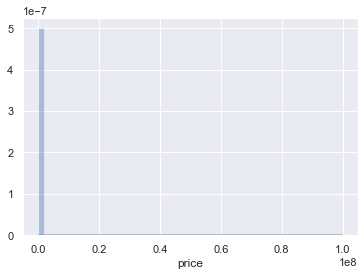

In [24]:
sns.distplot(data['price'])

In [25]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,2.609560e+05,260956.000000,260956.000000,260956.000000,260956.000000,260956.0,260956.000000
mean,8.208628e+03,2003.309500,126.332366,124058.672726,6.182552,0.0,51818.711177
std,3.433091e+05,6.512161,145.277559,39848.176772,3.471359,0.0,25843.428111
min,0.000000e+00,1910.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1.500000e+03,1999.000000,78.000000,100000.000000,3.000000,0.0,31226.000000
50%,3.850000e+03,2004.000000,116.000000,150000.000000,6.000000,0.0,51103.000000
75%,8.600000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,72766.000000
max,1.000000e+08,2018.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


### Dealing with Outliers

In [26]:
q = data['price'].quantile(0.99)
data_updated = data[data['price']<q]
data_updated.describe(include = 'all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,258339,258339,258339,258339,258339.000000,258339,258339,258339.000000,258339,258339.000000,258339,258339.000000,258339.000000,258339,258339,258339,258339,258339.0,258339.000000,258339
unique,211945,148555,2,2,NaN,2,8,NaN,2,NaN,249,NaN,NaN,7,39,2,106,NaN,NaN,135182
top,2016-04-02 22:54:55,BMW_318i,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:45:59
freq,5,619,258337,258335,NaN,134109,75962,NaN,199287,NaN,20947,NaN,NaN,167646,53997,230366,10230,NaN,NaN,16
mean,NaN,NaN,NaN,NaN,6154.222909,NaN,NaN,2003.267679,NaN,124.530408,NaN,124738.192840,6.185392,NaN,NaN,NaN,NaN,0.0,51752.908291,NaN
std,NaN,NaN,NaN,NaN,6556.087079,NaN,NaN,6.412773,NaN,142.639985,NaN,39224.660001,3.473728,NaN,NaN,NaN,NaN,0.0,25843.029266,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1910.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1500.000000,NaN,NaN,1999.000000,NaN,77.000000,NaN,100000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,31185.000000,NaN
50%,NaN,NaN,NaN,NaN,3800.000000,NaN,NaN,2004.000000,NaN,116.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,51065.000000,NaN
75%,NaN,NaN,NaN,NaN,8499.000000,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,72654.000000,NaN


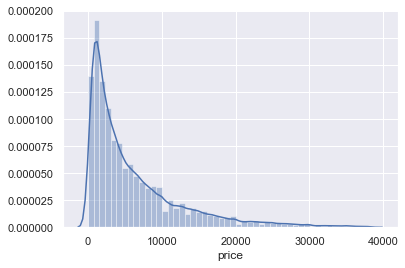

In [27]:
sns.distplot(data_updated['price'])

DataFrame.reset_index(drop = True)->to reset the indices in the new dataset

In [28]:
data_updated = data_updated.iloc[:, [2,3,6,7,8,9,10,11,12,13,14,15,4]]

In [29]:
data_updated

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
3,privat,Angebot,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,1500
4,privat,Angebot,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,3600
5,privat,Angebot,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,650
6,privat,Angebot,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2200
7,privat,Angebot,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,privat,Angebot,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,3200
371521,privat,Angebot,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,1150
371524,privat,Angebot,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,1199
371525,privat,Angebot,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,9200


In [30]:
#Convert text to numeric using Label Encoding
from sklearn import preprocessing

## Checking the OLS assumptions

### Check for Linearity

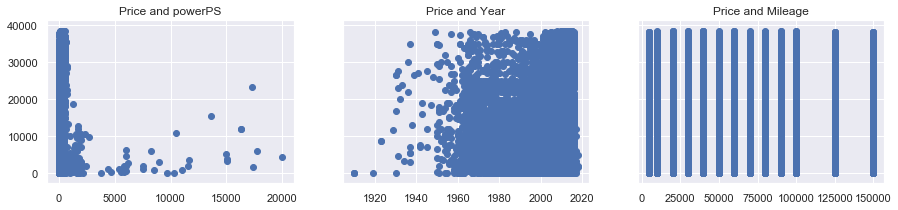

In [31]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, sharey = True,figsize = (15,3))
ax1.scatter(data_updated['powerPS'],data_updated['price'])
ax1.set_title('Price and powerPS')
ax2.scatter(data_updated['yearOfRegistration'],data_updated['price'])
ax2.set_title('Price and Year')
ax3.scatter(data_updated['kilometer'],data_updated['price'])
ax3.set_title('Price and Mileage')

plt.show()

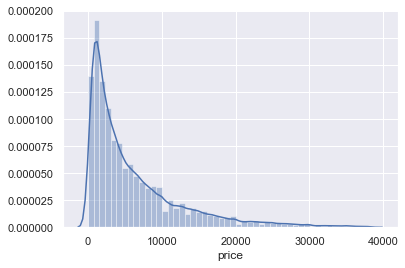

In [32]:
sns.distplot(data_updated['price'])

Relaxing the assumption

In [33]:
log_price = np.log(data_updated['price'])
data_updated['log_price'] = log_price

D:\Anaconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


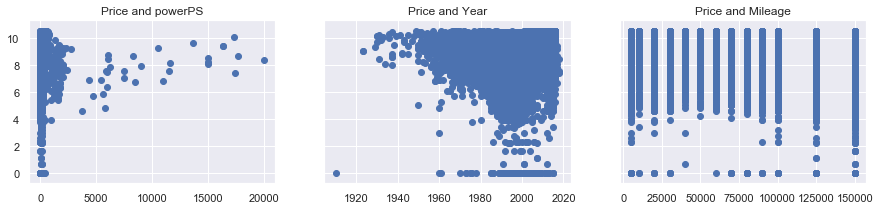

In [34]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, sharey = True,figsize = (15,3))
ax1.scatter(data_updated['powerPS'],data_updated['log_price'])
ax1.set_title('Price and powerPS')
ax2.scatter(data_updated['yearOfRegistration'],data_updated['log_price'])
ax2.set_title('Price and Year')
ax3.scatter(data_updated['kilometer'],data_updated['log_price'])
ax3.set_title('Price and Mileage')

plt.show()

In [37]:
data_updated.drop('log_price',axis=1,inplace=True)
data_updated
#inplace = True -> changes in the original dataframe

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
3,privat,Angebot,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,1500
4,privat,Angebot,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,3600
5,privat,Angebot,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,650
6,privat,Angebot,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2200
7,privat,Angebot,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,privat,Angebot,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,3200
371521,privat,Angebot,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein,1150
371524,privat,Angebot,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,1199
371525,privat,Angebot,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,9200


### Multicolinearity
#### Using Variance Inflation Factor from statsmodels.api

In [38]:
data_updated.columns.values

array(['seller', 'offerType', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'price'], dtype=object)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_updated[['yearOfRegistration','powerPS','kilometer']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [42]:
vif

,VIF,features
0,11.768389,yearOfRegistration
1,1.763144,powerPS
2,11.024077,kilometer


VIF = 1 -> no multicollinearity
1<VIF<5 : perfectly okay

## Dealing with Dummy Variables
For n categories there will be n-1 dummy variables
LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.
LabelEncoder encodes the categorical variables into numerical values.

In [43]:
data_encoded = data_updated.apply(preprocessing.LabelEncoder().fit_transform)

In [44]:
data_encoded

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
3,1,0,4,71,1,75,117,12,6,1,37,1,579
4,1,0,4,78,1,69,102,9,7,3,31,1,1146
5,1,0,6,65,1,102,11,12,10,1,2,0,271
6,1,0,2,74,1,109,8,12,8,1,25,1,777
7,1,0,6,50,1,50,40,4,7,1,37,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,1,0,6,74,1,225,141,12,5,1,30,0,1043
371521,1,0,1,70,1,0,248,12,3,1,24,1,453
371524,1,0,2,70,0,101,107,11,3,1,32,1,471
371525,1,0,1,66,1,102,223,12,3,3,37,1,2225


Text(0, 0.5, 'price')

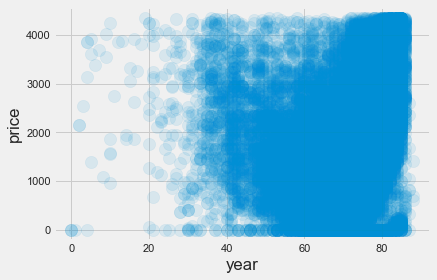

In [45]:
plt.style.use('fivethirtyeight')
# plt.rcParams['figure.figsize'] = (10, 6)
#Plot year vs price
plt.scatter(data_encoded.yearOfRegistration, 
           data_encoded.price,
           s=150, alpha = 0.1) #alpha-> opaqueness 
plt.xlabel('year')
plt.ylabel('price')

## Dummies using pandas
#### pd.get_dummies(DataFrame,drop_first = True)
drop_first -> not to create the dummy for the first variable

# Linear Regression Model

### Declare inputs and the targets

In [46]:
data_encoded.columns

Index(['seller', 'offerType', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'price'],
      dtype='object')

In [47]:
targets = data_encoded['price']
inputs = data_encoded.drop(['price'],axis=1)

## Scale the data

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
inputs_scaled = scaler.transform(inputs)

## Train-Test Split

In [87]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(inputs_scaled, targets, test_size=0.2,random_state = 365 )

## Create the regression

In [88]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
yhat = reg.predict(x_train)

In [90]:
yhat

array([ 778.1640881 , 2117.65223053,  969.74769178, ..., 1594.6787914 ,
       2620.64850845, 2358.51723347])

## Plot and verify the regression

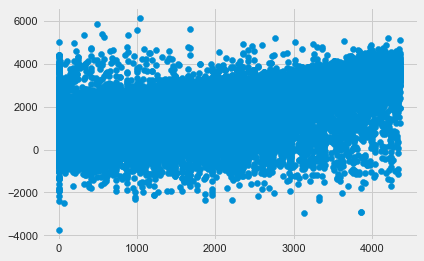

In [91]:
plt.scatter(y_train, yhat)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

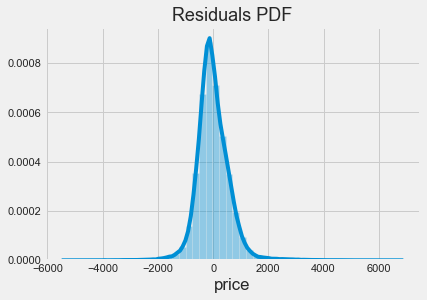

In [92]:
sns.distplot(y_train-yhat)
plt.title("Residuals PDF",size = 18)

In [93]:
reg.score(x_train,y_train) #Rsquared 

0.6592449971330572

In [94]:
reg.intercept_

1426.9475379301582

In [95]:
reg.coef_

array([ 556.42022878,   -1.29354659,  -47.19189715,  327.32778452,
        -79.14010343,  432.21429843,    9.24041482, -329.73589133,
          4.38520932,  123.09456544,    0.88202887,  142.84736642])

In [96]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights']= reg.coef_
reg_summary

,Features,Weights
0,seller,556.420229
1,offerType,-1.293547
2,vehicleType,-47.191897
3,yearOfRegistration,327.327785
4,gearbox,-79.140103
5,powerPS,432.214298
6,model,9.240415
7,kilometer,-329.735891
8,monthOfRegistration,4.385209
9,fuelType,123.094565


## Testing

In [97]:
yhat_test = reg.predict(x_test)
yhat_test

array([1990.08953903,  451.80108039, 2244.62145573, ...,  834.13472893,
        369.28898358, 2372.33205836])

In [98]:
y_test= y_test.reset_index(drop = True)
y_test

0        2914
1         203
2        2732
3         472
4        2235
         ... 
51663    2075
51664    2621
51665     732
51666     203
51667    2942
Name: price, Length: 51668, dtype: int64

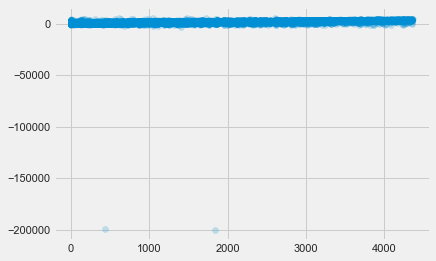

In [99]:
plt.scatter(y_test, yhat_test,alpha= 0.2)

plt.show()